# Cancer classification with Support Vector Machines

In this project, we'll work to predict if a patient suffuring from cancer is beningn or malignant.

Using historical data about patients diagnosed with cancer, enable the doctors to differentiate malignant cases and benign given the independent attributes.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

* ID number
* Diagnosis (M = malignant, B = benign)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1) 
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

In [2]:
data = pd.read_csv('data/cancer.csv')
df = data.fillna(method="ffill")

## Exploratory Analysis

Before making any classification, firstly we start with basic data analysis. Lets look at features of data.

In [3]:
df.columns

Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            699 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
 9   Class                  699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [6]:
df['Class']= df.Class.map({'benign':1,'malignant':0})

In [7]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,1


## Feature Selection

In [8]:
df.columns

Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
x = df.loc[:,['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

In [10]:
y = df.Class

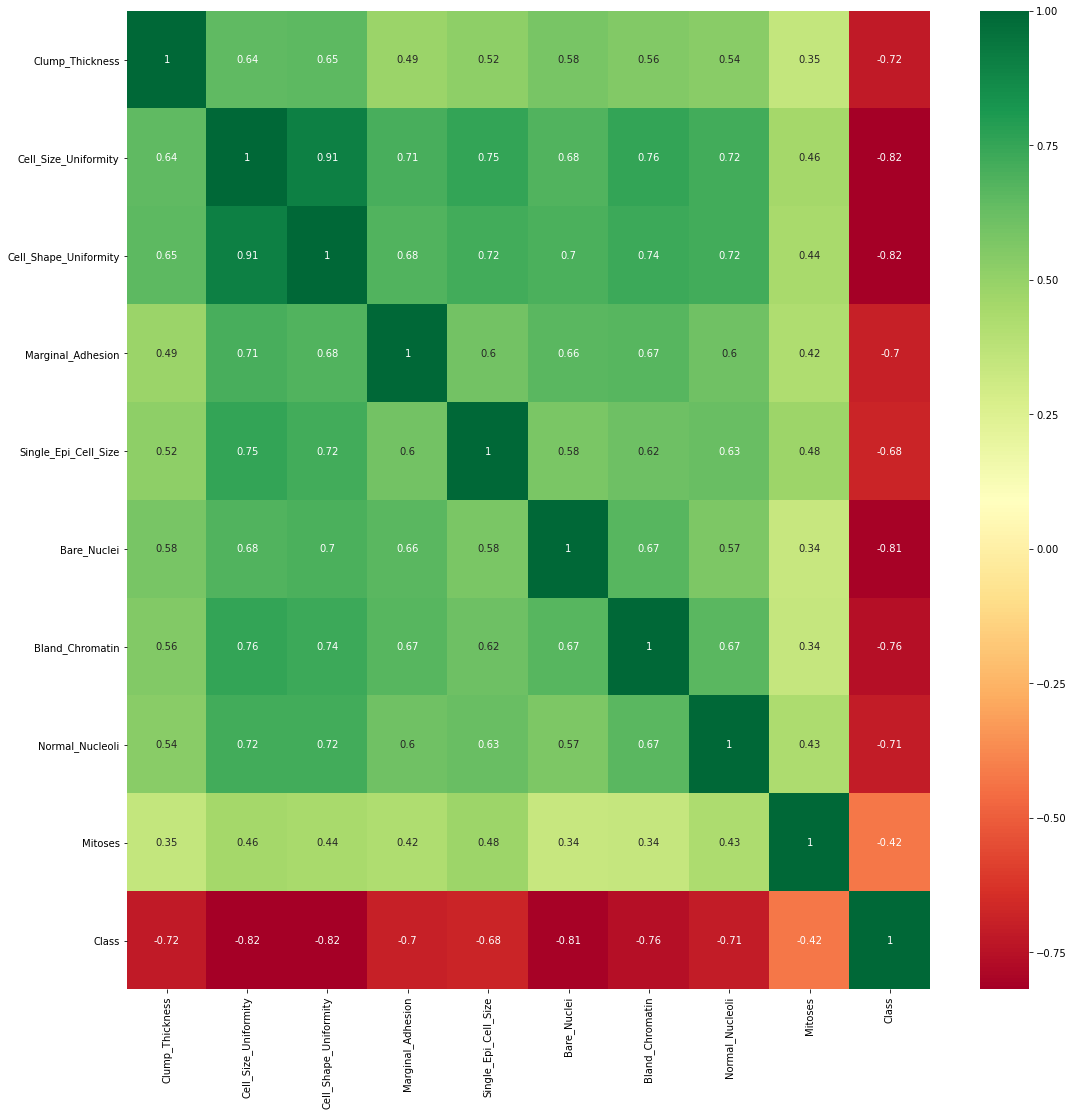

In [11]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [13]:
selection.feature_importances_

array([0.0568168 , 0.31051203, 0.19347163, 0.02475532, 0.04611624,
       0.24730302, 0.07269395, 0.03982338, 0.00850762])

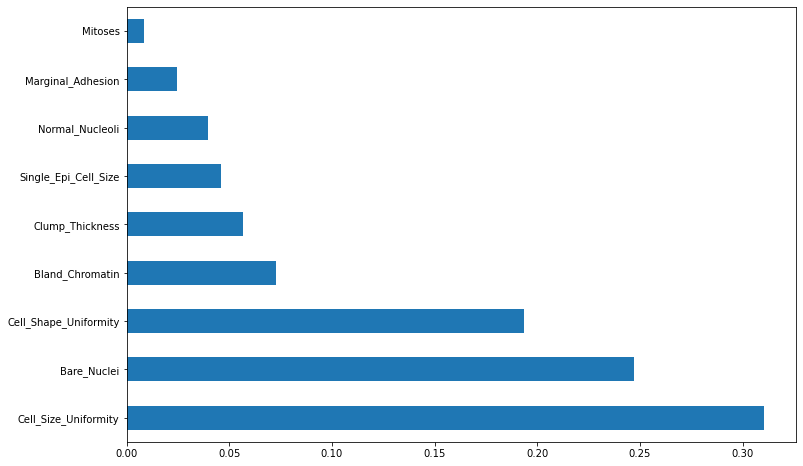

In [14]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model Building

We'll be spliting data into trainging and testing sets.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

target = df.Class
features = df.drop(['Class'], axis=1)

x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2, random_state=10)


Now its time to train a Support Vector Machine Classifier.

In [16]:
from sklearn.svm import SVC

svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(x_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

## Predictions and Evaluations

In [17]:
prediction = svc_model.predict(x_test)

print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test,y_test))

0.9713774597495528
0.9642857142857143


In [18]:
print(accuracy_score(y_test, prediction))

0.9642857142857143


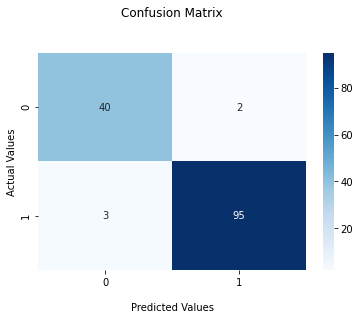

In [19]:
cf_matrix = confusion_matrix(y_test, prediction)

ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues")

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel('Actual Values')

plt.show()

In [20]:
import pickle

file = open("pred.pkl","wb")

pickle.dump(svc_model,file)

model = open("pred.pkl","rb")
forest = pickle.load(model)

y_pred = forest.predict(x_test)

accuracy_score(y_test,y_pred)

0.9642857142857143